In [2]:
#import the required modules
import numpy as np
import pandas as pd
import csv
from scipy.stats import norm
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt

In [3]:
#converting the dat file to csv file
# read SDSS_quasar.dat to a list of lists
datContent = [i.strip().split() for i in open("./SDSS_quasar.dat").readlines()]

# write it as a new CSV file
with open("./SDSS_quasar.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)


In [4]:
#selecting the required column
data = pd.read_csv('SDSS_quasar.csv', usecols=['z'])
data = data.values
t = np.linspace(-0.5, 5.5, 100)

In [5]:
#Computing the KDE values
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)
kde1 = kde1.score_samples(t.reshape(-1,1))

kde2 = KernelDensity(kernel='exponential', bandwidth=0.2).fit(data)
kde2 = kde2.score_samples(t.reshape(-1,1))

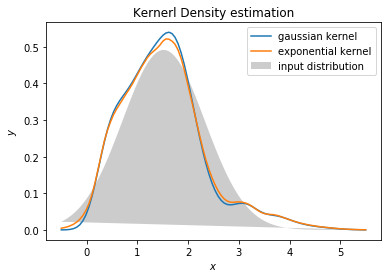

In [7]:
dist = norm(np.mean(data), np.std(data)).pdf(t.reshape(-1,1))

plt.plot(t, np.exp(kde1), label='gaussian kernel')
plt.plot(t, np.exp(kde2), label='exponential kernel')
plt.fill(t.reshape(-1,1), dist, fc='black', alpha=0.2,label='input distribution')

plt.title('Kernerl Density estimation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()